In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(["science", "notebook", "grid"])

In [3]:
class SolveEquation:
    def __init__(self, theta: np.ndarray, zhi: float, eta: float, xc: float, lambda_c: float) -> None:
        """ Initialize the class
        Args:
            theta: np.ndarray: the angle
            zhi: float: the angle
            eta: float: the angle
        """
        self.theta = theta
        self.zhi = zhi
        self.eta = eta
        self.xc = xc
        self.lambda_c = lambda_c

    def gamma(self) -> np.ndarray:
        """Define the gamam function
        """
        first_term_denom = (2 - self.zhi) * (((18 * self.theta + 3) / (3 * self.theta + 2)) - ((3 * self.theta * (9 * self.theta + 3)) / (3 * self.theta + 2) ** 2))
        second_term_denom = self.zhi * (((18 * self.theta + 3 / self.eta) / (3 * self.theta + 2 / self.eta)) - ((3 * self.theta * (9 * self.theta + 3 / self.eta)) / (3 * self.theta + 2 / self.eta) ** 2))
        return 1 + 2 / (first_term_denom + second_term_denom)
        
    def kappa(self):
        """define the kappa function"""
        gamma = self.gamma()
        lhs_first_term = (gamma + 1)
        lhs_second_term = ((self.xc * (self.xc - 1)) / (5 * self.xc - 3))
        lhs_third_term = ((1 / (2 * (self.xc - 1) ** 2)) - ((self.lambda_c ** 2) / (self.xc ** 3)))
        rhs = 2 * self.theta * self.lambda_c
        return rhs / (lhs_first_term * lhs_second_term * lhs_third_term)

In [20]:
# Define the parameters
theta: np.ndarray = np.linspace(0 , 2, 1000)
xc: float = 50.0  
zhi: float = 1.0
lambda_c: float = 1.8
eta: float = 0.5

# Initialize the class
solver = SolveEquation(theta = theta, zhi = zhi, eta = eta, xc = xc, lambda_c = lambda_c)

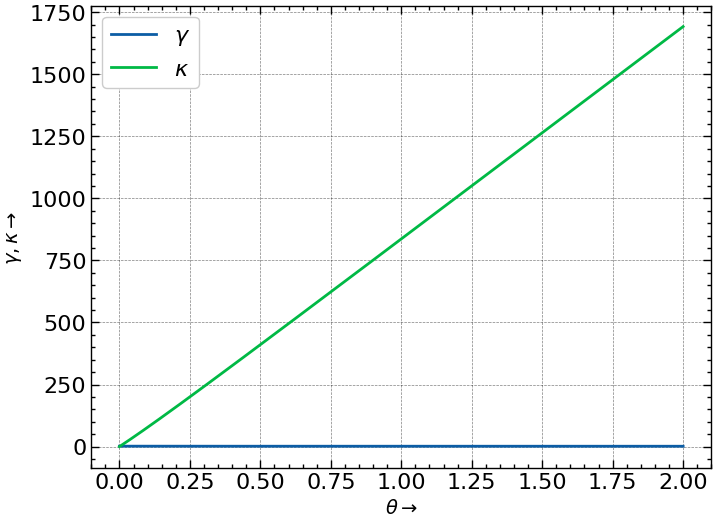

In [24]:
plt.plot(theta, solver.gamma(), label = r"$\gamma$")
plt.plot(theta, solver.kappa(), label = r"$\kappa$")
plt.xlabel(r"$\theta \rightarrow$", fontsize = 14)
plt.ylabel(r"$\gamma, \kappa \rightarrow$", fontsize = 14)
plt.legend()